# Tópicos Especiais em Processamento da Informação: Ciência de Dados

Prof. Luiz Affonso Guedes Engenharia de Computação - UFRN 2017-2

## Conteúdo: 
- Exercícios de classificação de dados com Classificador Decition Tree.
- Exercícios de Random Florest.


### Site do scikit-learn
http://scikit-learn.org/stable


#### Importação dos pacotes padrões:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()



## Árvores de Decisão e Random Florests

Material retirado do GitHub do Jake Vanderplas:

https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb

As árvores de decisão são uma técnica de aprendizado de máquinas poderosa e popular. O conceito básico é muito semelhante às árvores que você pode ter visto comumente usado para auxiliar na tomada de decisões.

O algoritmo da árvore de decisão é um algoritmo de aprendizagem supervisionado: primeiro construímos a árvore com dados históricos, e depois usamos isso para prever um resultado.

Uma das principais vantagens das árvores de decisão é que elas podem escolher interações não-lineares entre variáveis nos dados, o que a regressão linear não pode.

* Material retirado do site do scikit-learn:
http://scikit-learn.org/stable/modules/tree.html

DecisionTreeClassifier é uma classe capaz de realizar classificação multi-class sobre um dataset.

Como os outro sclassificadores no scikit-learn, DecisionTreeClassifier tem como entrada 02 arrays: um array X, esparso ou denso, de tamanho [n_samples, n_features] retendo as amostras de treinamento, e um array Y de valores inteiros, de tamanho [n_samples], retendo os labels das classes para as amostras de treinamento.

## Exemplo1: Dataset Iris

Criação de uma árvore de decisão

In [2]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Fazendo predição sobre o modelo treinado:

In [3]:
clf.predict([[2., 2.]])

array([1])

DecisionTreeClassifier é capaz de fazer classificação binária (quando os labels são [-1, 1]) e classificação multiclasse (quando os labels são [0, …, K-1]).

Usando o dataset Iris para exemplificar o uso deste classificador como multi-classes.

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [5]:
# Exemplo de predição
clf.predict(iris.data[:1, :])

array([0])

#### Programa para visualizar a classificaçãomdo dataset Iris

Automatically created module for IPython interactive environment


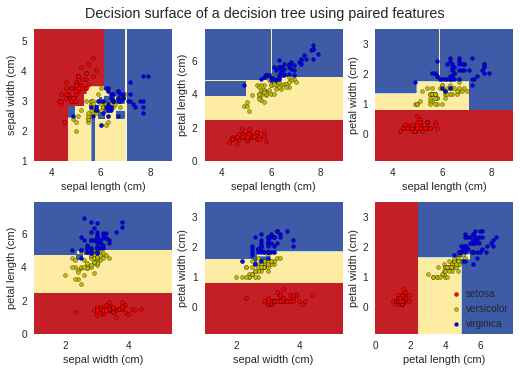

In [6]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

#### Instalação do pacote Graphviz, para apresentação da árvore de decisão

In [ ]:
# !conda install python-graphviz

In [7]:
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

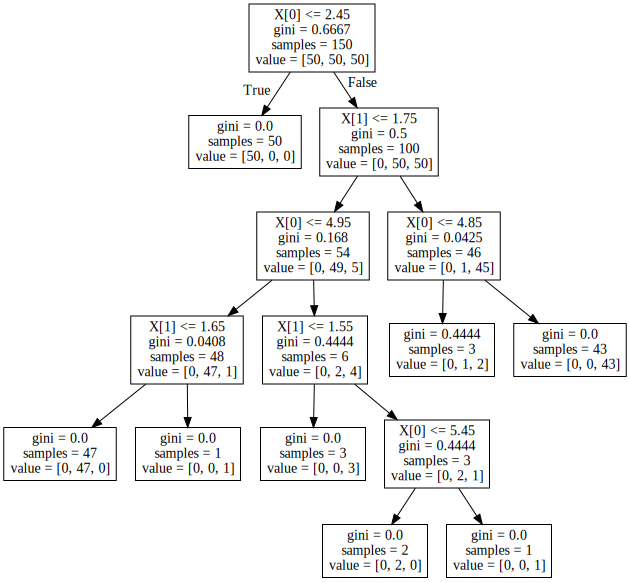

In [8]:
graph

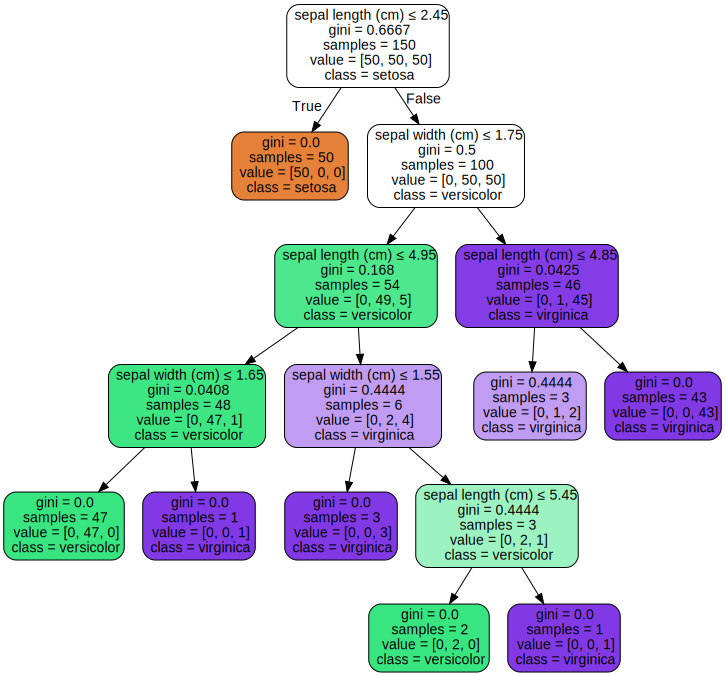

In [9]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 

## Exemplo 2: Árvore de Decisão e Random Florest
Material retirado do GitHub do Jake Vanderplas:

https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb


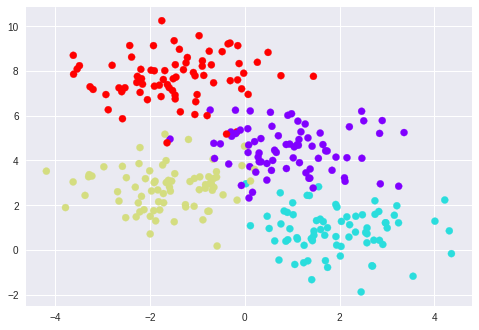

In [10]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [ ]:
X

In [ ]:
y

### Módulo para Apresentação do resultado dos classificadores

In [11]:
%%file helpers_05_08.py

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact


def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None, ax=None):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()
    
    # fit the estimator
    estimator.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='viridis', clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i >= 0:
            tree = estimator.tree_
        
            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],
                                [xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],
                                [tree.threshold[i], xlim[1]], ylim)
        
            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,
                                [ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,
                                [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, xlim, ylim)


def plot_tree_interactive(X, y):
    def interactive_tree(depth=5):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        visualize_tree(clf, X, y)

    return interact(interactive_tree, depth=[1, 5])


def randomized_tree_interactive(X, y):
    N = int(0.75 * X.shape[0])
    
    xlim = (X[:, 0].min(), X[:, 0].max())
    ylim = (X[:, 1].min(), X[:, 1].max())
    
    def fit_randomized_tree(random_state=0):
        clf = DecisionTreeClassifier(max_depth=15)
        i = np.arange(len(y))
        rng = np.random.RandomState(random_state)
        rng.shuffle(i)
        visualize_tree(clf, X[i[:N]], y[i[:N]], boundaries=False,
                       xlim=xlim, ylim=ylim)
    
    interact(fit_randomized_tree, random_state=[0, 100]);

Writing helpers_05_08.py



As figuras a seguir apresentam uma visualização dos primeiros 04 níveis de uma decision tree classifier.

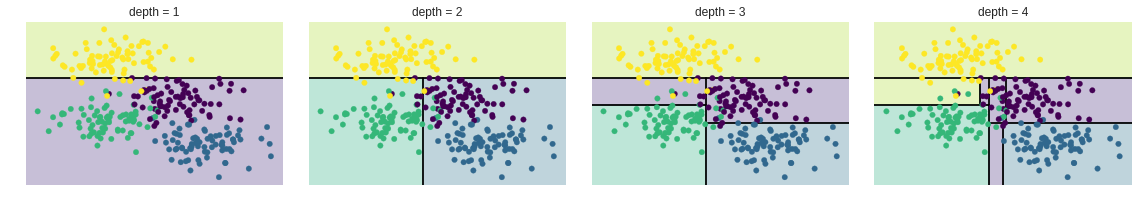

In [12]:
from helpers_05_08 import visualize_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

        
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

#fig.savefig('figures/05.08-decision-tree-levels.png')

Este processo de montagem de uma árvore de decisão para nossos dados pode ser feito no Scikit-Learn com o estimador DecisionTreeClassifier:

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

#### Função para VIsualização do Resultado

In [14]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

### Resultado da classificação:

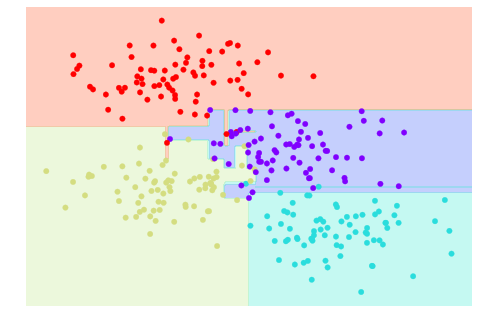

In [15]:
visualize_classifier(DecisionTreeClassifier(), X, y)

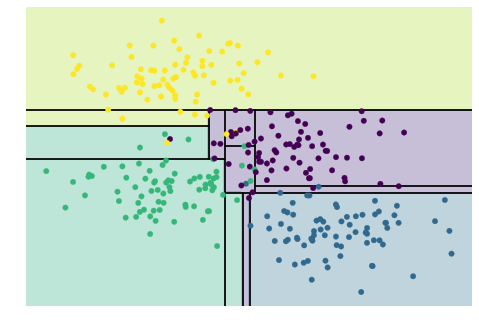

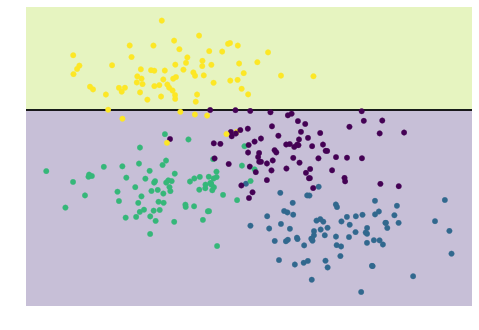

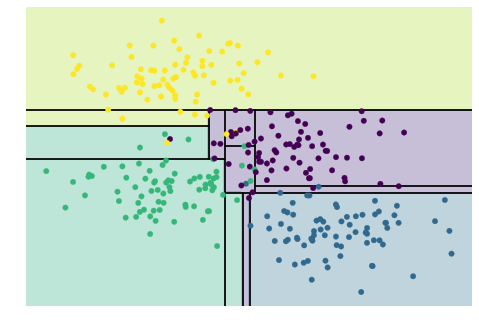

In [17]:
# helpers_05_08 is found in the online appendix
import helpers_05_08
helpers_05_08.plot_tree_interactive(X, y);

Observe que, à medida que a profundidade aumenta, tendemos a obter regiões de classificação muito estranhamente moldadas; por exemplo, em uma profundidade de cinco, há uma região roxa alta e estreita entre as regiões amarela e azul. É claro que isso é menos resultado da distribuição de dados verdadeira e intrínseca, e mais um resultado das propriedades específicas de amostragem ou ruído dos dados. Ou seja, esta árvore de decisão, mesmo com apenas cinco níveis de profundidade, está claramente altamente especializada nos nossos dados.

### Decision trees e over-fitting

Esse excesso de ajuste acaba por ser uma propriedade geral das árvores de decisão: é muito fácil ir muito fundo na árvore e, portanto, ajustar os detalhes dos dados específicos em vez das propriedades gerais das distribuições de que são retirados. Outra maneira de ver isso em excesso é olhar para modelos treinados em diferentes subconjuntos dos dados.

A seguir são apresentados resultados com conjuntos de dados distintos, que foram escolhidos randomicamente.


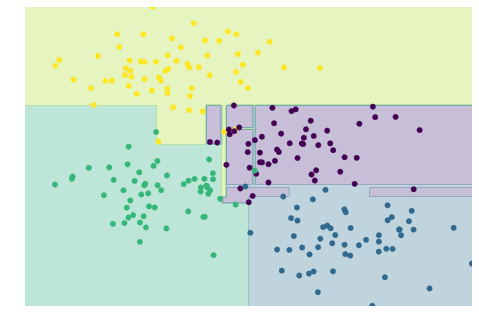

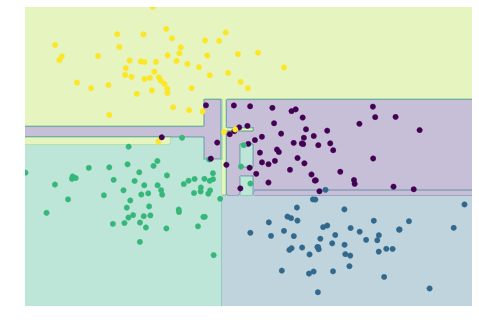

In [16]:
# helpers_05_08 is found in the online appendix
import helpers_05_08
helpers_05_08.randomized_tree_interactive(X, y)

### Ensembles of Estimators: Random Forests

Essa noção - que os estimadores de superposição múltipla podem ser combinados para reduzir o efeito dessa superposição - é o que está subjacente a um método de conjunto chamado "bagging". Bagging faz uso de um conjunto de estimadores paralelos, cada um dos quais supera os dados e mede os resultados para encontrar uma classificação melhor. 

Um conjunto de árvores de decisão aleatorizada é conhecida como floresta aleatória.

Este tipo de classificação pode ser feito manualmente usando o meta-estimador do Ensaio de Bagging do Scikit-Learn, conforme mostrado a seguir.

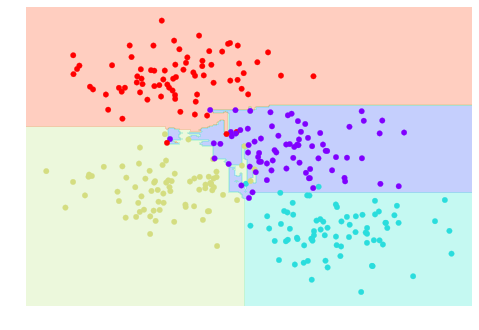

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

Neste exemplo, randomizamos os dados ajustando cada estimador com um subconjunto aleatório de 80% dos pontos de treinamento. Na prática, as árvores de decisão são mais efetivamente randomizadas, injetando alguma estocasticidade na forma como as divisões são escolhidas: desta forma, todos os dados contribuem para o ajuste de cada vez, mas os resultados do ajuste ainda possuem aleatoriedade desejada. Por exemplo, ao determinar qual recurso se dividir, a árvore randomizada pode selecionar entre os principais recursos.

No Scikit-Learn, um conjunto otimizado de árvores de decisão randomizadas é implementado no estimador RandomForestClassifier, que cuida de toda a randomização automaticamente. Tudo o que você precisa fazer é selecionar uma série de estimadores, e rapidamente (em paralelo, se desejar) se encaixam no conjunto de árvores.

Site do Scikit-learn: Random Florest:
http://scikit-learn.org/stable/modules/ensemble.html#forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
            
            

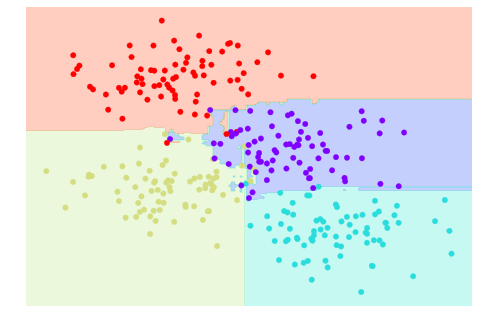

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);



Verificamos que, com a média de mais de 100 modelos perturbados aleatoriamente, acabamos com um modelo geral que está muito mais próximo de nossa intuição sobre como o espaço de parâmetros deve ser dividido.

## Exercício 1: Random Forest para classificação de Dígitos


In [21]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

Para nos lembrar o que estamos vendo, visualizaremos os primeiros pontos de dados:

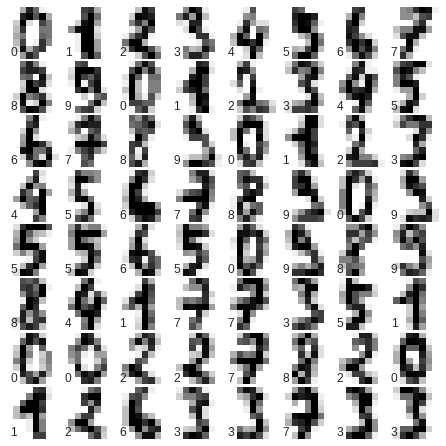

In [22]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Podemos classificar rapidamente os dígitos usando uma Random Florest da seguinte maneira:

In [25]:
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

Podemos dar uma olhada no relatório de classificação para este classificador:

In [26]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       0.98      0.95      0.97        44
          2       0.95      1.00      0.98        42
          3       0.98      0.98      0.98        45
          4       0.97      1.00      0.99        37
          5       0.98      0.96      0.97        49
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



E, para uma boa medida, trace a matriz de confusão:

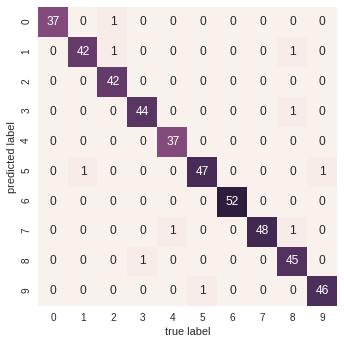

In [27]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Exercício 2: Dados do Censo Americano

Examinaremos a renda individual nos Estados Unidos. Os dados são do censo de 1994 e contêm informações sobre o estado civil, a idade, o tipo de trabalho e mais do indivíduo. A coluna de destino (target), ou o que queremos prever, é predizer se os indivíduos ganham menos ou igual a 50k por ano ou mais de 50k por ano, a partir dos outros dados.


Os dados podem ser obtidos a partir do website da University of California at Irvine.

http://archive.ics.uci.edu/ml/datasets/Adult

In [57]:
import pandas

# Set index_col to False to avoid pandas thinking that the first column is row indexes (it's age)
#income = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", index_col=False)

income = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")


In [58]:
# Apresenta as 5 primeira linhas do DataFrame
print(income.head(5))

   39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K 

In [59]:
# Apresenta a primeira linha do DataFrame
print(income.head(1))

   39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   

       Adm-clerical  Not-in-family   White   Male   2174   0   40  \
0   Exec-managerial        Husband   White   Male      0   0   13   

    United-States   <=50K  
0   United-States   <=50K  


In [60]:
income.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

#### Inclusão dos nomes das colunas
Esse DataFrame não tem nomes de colunas (features e target)
- Necessidade de incluir nomes nas colunas.    

Nomes das colunas do DataFrame:
Verifique em http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names o significado das colunas.
    
- age
- workclass
- fnlwgt
- education
- education_num
- marital_status
- occupation
- relationship
- race
- sex
- capital_gain
- capital_loss
- hours_per_week
- native_country
- high_income

In [61]:
# Inclusão dos nomes das colunas
income.columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain","capital_loss", "hours_per_week", "native_country", "high_income"]


In [62]:
income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'high_income'],
      dtype='object')

In [63]:
print(income.head(1))

   age          workclass  fnlwgt   education  education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   

        marital_status        occupation relationship    race    sex  \
0   Married-civ-spouse   Exec-managerial      Husband   White   Male   

   capital_gain  capital_loss  hours_per_week  native_country high_income  
0             0             0              13   United-States       <=50K  


#### Verificação do conteúdo da feature "workclass)

In [64]:
print(income["workclass"].head(5))

0     Self-emp-not-inc
1              Private
2              Private
3              Private
4              Private
Name: workclass, dtype: object


Como a feature é um dado ccategórico (expresso em texto), há a necessidade de convertê-lo em valor numérico:

In [65]:
# Conversão de uma coluna de texto categórico para números
col = pandas.Categorical.from_array(income["workclass"])
income["workclass"] = col.codes
print(income["workclass"].head(5))

0    6
1    4
2    4
3    4
4    4
Name: workclass, dtype: int8


/opt/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  


O valor 'Private' na coluna 'workclass' foi mapeado para o código numérico 4 (podemos verificar isso comparando os valores na coluna da classe de trabalho que costumava ter o rótulo 'Private' com os valores atuais para ver onde eles se alinham).

In [66]:
# Enter your code here
private_incomes = income[income["workclass"] == 4]
public_incomes = income[income["workclass"] != 4]

print(private_incomes.shape)
print(public_incomes.shape)

(22696, 15)
(9864, 15)


Executer a linha a baixo e verifique como o Pandas processa as sub-tabela

In [67]:
income["workclass"] == 4

0        False
1         True
2         True
3         True
4         True
5         True
6        False
7         True
8         True
9         True
10       False
11        True
12        True
13        True
14        True
15       False
16        True
17        True
18       False
19        True
20        True
21       False
22        True
23        True
24       False
25        True
26       False
27        True
28        True
29       False
         ...  
32530    False
32531     True
32532     True
32533     True
32534     True
32535     True
32536     True
32537     True
32538    False
32539    False
32540    False
32541    False
32542    False
32543     True
32544    False
32545     True
32546     True
32547    False
32548    False
32549    False
32550     True
32551     True
32552     True
32553     True
32554     True
32555     True
32556     True
32557     True
32558     True
32559    False
Name: workclass, Length: 32560, dtype: bool

#### Instrução:

Converte as outras variáveis categóricas d etexto para numérica:
- education
- marital_status
- occupation
- relationship
- race
- sex
- native_country
- high_income

In [68]:
# Conversão das variáveis categóricas de texto para numérica

# Conversão de uma coluna de texto categórico para números
col = pandas.Categorical.from_array(income["education"])
income["education"] = col.codes
print(income["education"].head(5))

# Conversão de uma coluna de texto categórico para números
col = pandas.Categorical.from_array(income["marital_status"])
income["marital_status"] = col.codes
print(income["marital_status"].head(5))

# Conversão de uma coluna de texto categórico para números
col = pandas.Categorical.from_array(income["occupation"])
income["occupation"] = col.codes
print(income["occupation"].head(5))

# Conversão de uma coluna de texto categórico para números
col = pandas.Categorical.from_array(income["relationship"])
income["relationship"] = col.codes
print(income["relationship"].head(5))

# Conversão de uma coluna de texto categórico para números
col = pandas.Categorical.from_array(income["race"])
income["race"] = col.codes
print(income["race"].head(5))

# Conversão de uma coluna de texto categórico para números
col = pandas.Categorical.from_array(income["sex"])
income["sex"] = col.codes
print(income["sex"].head(5))

# Conversão de uma coluna de texto categórico para números
col = pandas.Categorical.from_array(income["native_country"])
income["native_country"] = col.codes
print(income["native_country"].head(5))

# Conversão de uma coluna de texto categórico para números
col = pandas.Categorical.from_array(income["high_income"])
income["high_income"] = col.codes
print(income["high_income"].head(5))

0     9
1    11
2     1
3     9
4    12
Name: education, dtype: int8
0    2
1    0
2    2
3    2
4    2
Name: marital_status, dtype: int8
0     4
1     6
2     6
3    10
4     4
Name: occupation, dtype: int8
0    0
1    1
2    0
3    5
4    5
Name: relationship, dtype: int8
0    4
1    4
2    2
3    2
4    4
Name: race, dtype: int8
0    1
1    1
2    1
3    0
4    0
Name: sex, dtype: int8
0    39
1    39
2    39
3     5
4    39
Name: native_country, dtype: int8
0    0
1    0
2    0
3    0
4    0
Name: high_income, dtype: int8


/opt/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  after removing the cwd from sys.path.
/opt/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  if __name__ == '__main__':
/opt/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  
/opt/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/opt/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/opt/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
/opt/Anaconda/lib/python3.6/site-packages/ipykernel_launcher

#### Transformando Variáveis categórica para o Padrão do SciKitLearn

Uma maneira é transformar as variáveis para tipo 'dummy'.

- Exemplo: 

     df = pd.get_dummies(df, columns=['type'])

Os códigos categóricos são apenas valores inteiros para os itens exclusivos na categoria dada. Em contraste, get_dummies() retorna uma nova coluna para cada item exclusivo. O valor na coluna indica se a gravação possui ou não esse atributo.




In [69]:
#Exemplo de Uso
df = pandas.DataFrame({'cat': pandas.Categorical(['a', 'a', 'a', 'b', 'b', 'c'])})
df2 = pandas.DataFrame({'cat': [1, 1, 1, 2, 2, 3]})

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
cat    6 non-null category
dtypes: category(1)
memory usage: 190.0 bytes


In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
cat    6 non-null int64
dtypes: int64(1)
memory usage: 128.0 bytes


In [72]:
pandas.get_dummies(df)

,cat_a,cat_b,cat_c
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
5,0,0,1


#### Importação do conjunto de Teste
- Importação do conjunto de teste
- Inclusão dos títulos das colunas
- Conversão das variáveis textuais

In [92]:

income_test = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test")
#income_test = income_test.reset_index()
#print(income_test.head(5))
income_test

,,,,,,,,,,,,,,|1x3 Cross validator
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


In [76]:
# Inclusão dos títulos das colunas
income_test.columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain","capital_loss", "hours_per_week", "native_country", "high_income"]



ValueError: Length mismatch: Expected axis has 1 elements, new values have 15 elements

In [75]:
# Conversão das variáveis categóricas textuais para munéricas

for column in ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain","capital_loss", "hours_per_week", "native_country", "high_income"] :
    col = pandas.Categorical.from_array(income_test[column])
    income_test[column] = col.codes
    print(income_test[column].head(5))


KeyError: 'age'

### Usando o SciKitLearn

Podemos usar o pacote scikit-learn para se treinar uma árvore de decisão. A interface é muito semelhante a outros algoritmos de classificação.
- Utiliza-se a classe DecisionTreeClassifier para problemas de classificação
- Utiliza-se a classe DecisionTreeRegressor para problemas de regressão. 
- O pacote sklearn.tree inclui ambas as classes.


Neste caso, como queremos um resultado binário, usaremos um classificador.

O primeiro passo é treinar o classificador nos dados. 
- Usaremos o método de ajuste em um classificador para fazer isso.

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [51]:
from sklearn.tree import DecisionTreeClassifier

# A list of columns to train with
# We've already converted all columns to numeric
features_train = income[["age", "workclass","education_num", "marital_status", "occupation", "relationship", "race", "sex", "hours_per_week", "native_country"]]
target = income["high_income"]


In [52]:
features_train.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country
0,33,6,12,2,4,0,4,1,12,39
1,21,4,8,0,6,1,4,1,39,39
2,36,4,6,2,6,0,2,1,39,39
3,11,4,12,2,10,5,2,0,39,5
4,20,4,13,2,4,5,4,0,39,39


In [53]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: high_income, dtype: int8

In [56]:
# Instantiate the classifier
# Set random_state to 1 to make sure the results are consistent
clf = DecisionTreeClassifier(random_state=1)

# We've already loaded the variable "income," which contains all of the income data
clf.fit(features_train, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

#### Testando a precisão do modelo

Agora que nos treinamos o modelo, podemos fazer previsões. 

- É preciso dividir os dados em conjuntos de treinamento e testes primeiro. 
- Se não o fizermos, estaremos fazendo previsões sobre os mesmos dados com os quais treinamos nosso algoritmo.
- Isso leva a 'overfit', e fará com que nosso erro pareça mais baixo do que é.

Precisamos, então, dividir nossos dados em conjuntos de treinamento e testes primeiro. 

In [55]:
# Exemplo de predição
# utilize o conjunto de tests para fazer as predições

from sklearn import tree

clf = tree.DecisionTreeClassifier()
predictions = clf.predict(features_test)

NameError: name 'features_test' is not defined

In [ ]:
from sklearn import metrics
ypred = predictions
ytest = target
print(metrics.classification_report(ypred, ytest))

#### Exercício: Utilize a matriz de Confusão para analisar a qualidade da classificação.

In [ ]:
# Matriz de confusão do classificador
from sklearn.metrics import confusion_matrix

???

#### Analise a influência de parâmetros sobre desempenho de árvores de decisão
- parâmetro "tamanho do conjunto de treino"
- parâmetro "número de níveis da árvore.

In [ ]:
# Decision trees model - parametric performance

#clf = DecisionTreeClassifier(random_state=1)
#clf = DecisionTreeClassifier(min_samples_split=13, random_state=1)
#clf = DecisionTreeClassifier(random_state=1, min_samples_split=13, max_depth=7)

clf = DecisionTreeClassifier(random_state=1, min_samples_split=100, max_depth=2)

clf.fit(features_train, target)
predictions = clf.predict(features_test)

ypred = predictions
ytest = target
print(metrics.classification_report(ypred, ytest))

### Exercício 3: Random Florest
- Utilize a técnica de Random Florest para classificar a variável "high_income" do exercíco anterior.

In [ ]:
# Resolução do problema
